In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
df = pd.read_csv("Desktop/hypothyroid.csv")

In [6]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,P


In [7]:
df.shape

(3772, 30)

In [8]:
df.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,288,2,70,2,242,2,147,2,235,1,1,5,2
top,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,?,t,?,t,?,t,?,t,?,f,?,other,P
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,3535,3754,3738,3676,3771,3588,3403,369,3003,769,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [9]:
df = df.drop(['TSH measured','T3 measured','TT4 measured','T4U measured','FTI measured','TBG','TBG measured','referral source','query on thyroxine','query hypothyroid','query hyperthyroid'],axis = 1)

In [10]:
df.dtypes

age                          object
sex                          object
on thyroxine                 object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH                          object
T3                           object
TT4                          object
T4U                          object
FTI                          object
binaryClass                  object
dtype: object

In [11]:
df = df.replace({'f':0,'t':1})

In [12]:
df['sex'] = df['sex'].replace({'F':0,'M':1})

In [13]:
df = df.replace({'?':np.nan})

In [14]:
df[['age','TSH','T3','TT4','T4U','FTI']] = df[['age','TSH','T3','TT4','T4U','FTI']].apply(pd.to_numeric)

In [15]:
df['binaryClass'] = df['binaryClass'].replace({'P':0,'N':1})

In [16]:
df.dtypes

age                          float64
sex                          float64
on thyroxine                   int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
binaryClass                    int64
dtype: object

In [17]:
df.head()

,age,sex,on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,binaryClass
0,41.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1.30,2.5,125.0,1.14,109.0,0
1,23.0,0.0,0,0,0,0,0,0,0,0,0,0,0,4.10,2.0,102.0,NaN,NaN,0
2,46.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,109.0,0.91,120.0,0
3,70.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175.0,NaN,NaN,0
4,70.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61.0,0.87,70.0,0


In [18]:
df.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
binaryClass                    0
dtype: int64

In [181]:
#df['age'].fillna((df['age'].mean()), inplace = True)
#df['TSH'].fillna((df['TSH'].mean()), inplace = True)
#df['T3'].fillna((df['T3'].mean()), inplace = True)
#df['TT4'].fillna((df['TT4'].mean()), inplace = True)
#df['T4U'].fillna((df['T4U'].mean()), inplace = True)
#df['FTI'].fillna((df['FTI'].mean()), inplace = True)
#df['sex'].fillna((df['sex'].mode()[0]), inplace = True)

In [19]:
from sklearn.model_selection import train_test_split

y = df['binaryClass']
X = df.drop(['binaryClass'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 20)

In [20]:
X_train['TSH'].min()

0.005

In [21]:
X_test['TSH'].min()

0.005

In [22]:
from sklearn.impute import KNNImputer
knnimp = KNNImputer(n_neighbors=5, weights = 'distance')

X_train_imp = pd.DataFrame(knnimp.fit_transform(X_train), columns = X.columns.values.tolist())
X_test_imp = pd.DataFrame(knnimp.transform(X_test), columns = X.columns.values.tolist())

In [73]:
X_train_imp.head()

,age,sex,on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI
0,74.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,1.095445,96.0,0.930000,10.148892
1,28.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.875469,1.449138,125.0,1.316373,9.796342
2,73.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.788457,1.581139,110.0,1.280000,9.219544
3,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.389313,1.489966,116.8,0.948000,10.276186
4,61.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.587787,1.378405,102.0,1.060000,9.848858


In [24]:
X_test_imp.head()

,age,sex,on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI
0,58.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.22,2.6,156.0,1.11,140.0
1,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.00,2.4,25.0,1.21,20.0
2,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.60,2.1,79.0,0.89,90.0
3,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08,4.8,257.0,1.20,214.0
4,36.8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.60,1.5,120.0,0.82,146.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'TSH'),
  Text(1, 0, 'FTI'),
  Text(2, 0, 'TT4'),
  Text(3, 0, 'T3'),
  Text(4, 0, 'on thyroxine'),
  Text(5, 0, 'pregnant'),
  Text(6, 0, 'sex'),
  Text(7, 0, 'goitre'),
  Text(8, 0, 'on antithyroid medication'),
  Text(9, 0, 'psych'),
  Text(10, 0, 'thyroid surgery'),
  Text(11, 0, 'tumor'),
  Text(12, 0, 'I131 treatment'),
  Text(13, 0, 'sick'),
  Text(14, 0, 'hypopituitary'),
  Text(15, 0, 'T4U'),
  Text(16, 0, 'age'),
  Text(17, 0, 'lithium')])

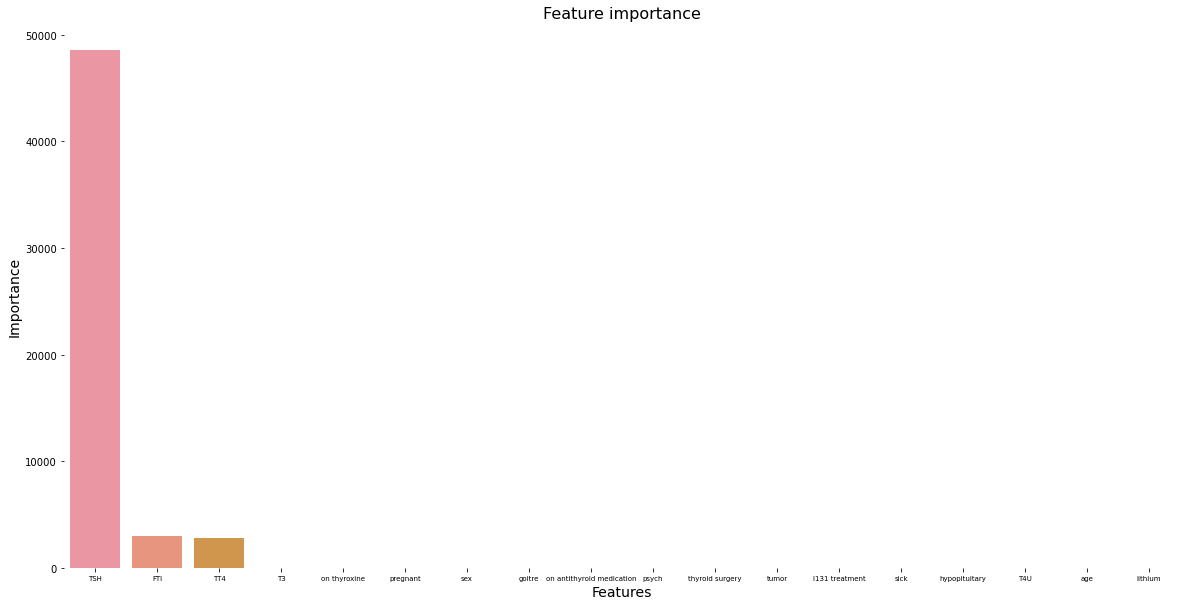

In [26]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

bestfeatures = SelectKBest(score_func=chi2)
fit = bestfeatures.fit(X_train_imp,y_train)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train_imp.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']
featureScores = featureScores.sort_values(by='Score', ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(x='Features', y='Score', data=featureScores)
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(fontsize = 7)

In [27]:
features_list = featureScores["Features"].tolist()[:5]
features_list

['TSH', 'FTI', 'TT4', 'T3', 'on thyroxine']

<AxesSubplot:xlabel='FTI', ylabel='Density'>

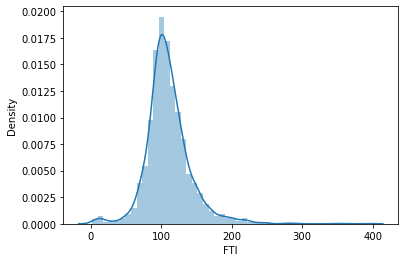

In [28]:
sns.distplot(X_train_imp['FTI'])

In [29]:
X_train_imp['FTI'] = (X_train_imp['FTI'])**0.5

<AxesSubplot:xlabel='FTI', ylabel='Density'>

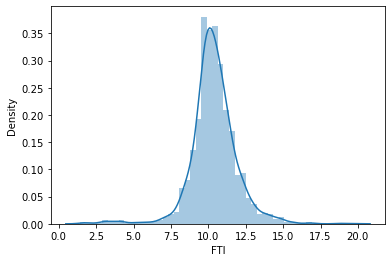

In [30]:
sns.distplot(X_train_imp['FTI'])

<AxesSubplot:xlabel='FTI'>

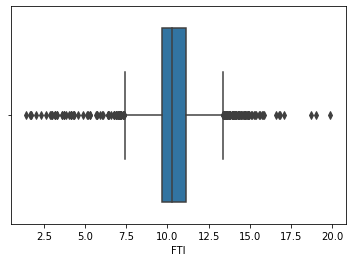

In [31]:
sns.boxplot(X_train_imp['FTI'])

<AxesSubplot:xlabel='TSH', ylabel='Density'>

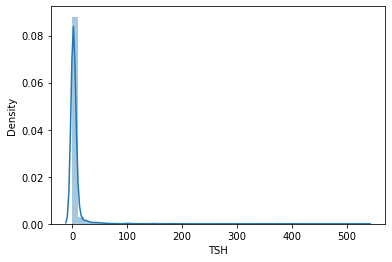

In [32]:
sns.distplot(X_train_imp['TSH'])

In [33]:
X_train_imp['TSH'] = np.log(X_train_imp['TSH'])

<AxesSubplot:xlabel='TSH', ylabel='Density'>

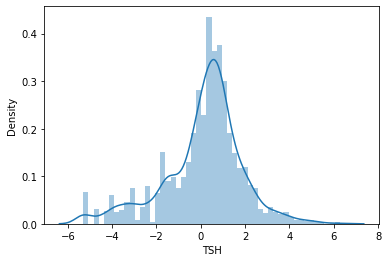

In [34]:
sns.distplot(X_train_imp['TSH'])

<AxesSubplot:xlabel='TSH'>

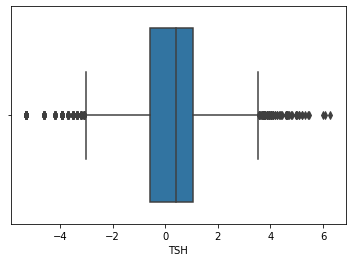

In [35]:
sns.boxplot(X_train_imp['TSH'])

<AxesSubplot:xlabel='TT4', ylabel='Density'>

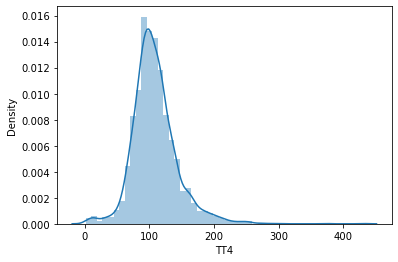

In [36]:
sns.distplot(X_train_imp['TT4'])

<AxesSubplot:xlabel='TT4', ylabel='Density'>

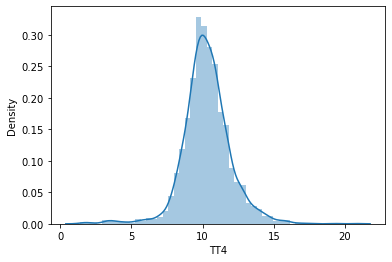

In [37]:
sns.distplot((X_train_imp['TT4'])**0.5)

<AxesSubplot:xlabel='TT4'>

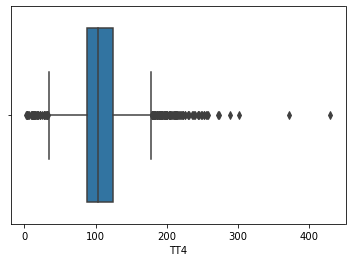

In [38]:
sns.boxplot(X_train_imp['TT4'])

<AxesSubplot:xlabel='T3', ylabel='Density'>

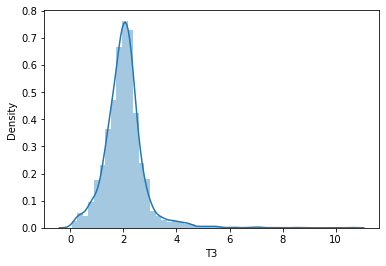

In [39]:
sns.distplot(X_train_imp['T3'])

<AxesSubplot:xlabel='T3'>

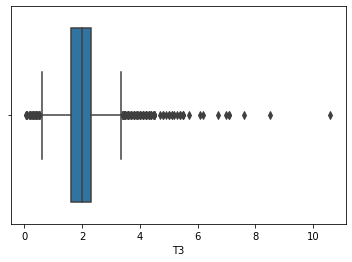

In [40]:
sns.boxplot(X_train_imp['T3'])

In [41]:
X_train_imp['T3'] = (X_train_imp['T3'])**0.5

<AxesSubplot:xlabel='T3', ylabel='Density'>

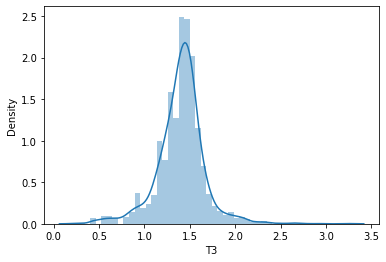

In [42]:
sns.distplot(X_train_imp['T3'])

<AxesSubplot:xlabel='T3'>

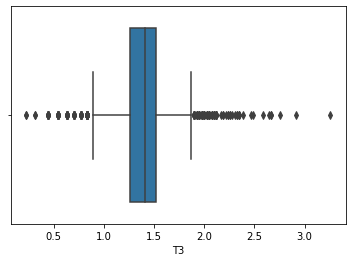

In [43]:
sns.boxplot(X_train_imp['T3'])

In [44]:
def outlier(x,df):
    q1 = df[x].quantile(0.25)
    q3 = df[x].quantile(0.75)
    iqr = q3-q1
    ul = q3 + 1.5*iqr
    ll = q1 - 1.5*iqr
    
    def outlier_treat(y):
        if y<ll:
            return ll
        elif y>ul:
            return ul
        else:
            return y
    df[x] = df[x].apply(outlier_treat)

In [45]:
for col in ['TSH', 'FTI', 'TT4', 'T3']: 
    outlier(col,X_train_imp)

<AxesSubplot:xlabel='T3'>

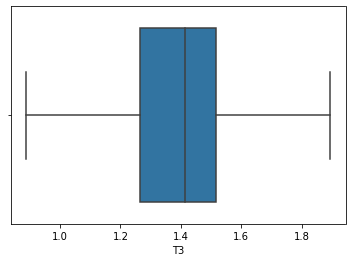

In [46]:
sns.boxplot(X_train_imp['T3'])

<AxesSubplot:xlabel='FTI'>

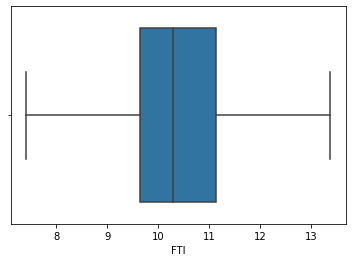

In [47]:
sns.boxplot(X_train_imp['FTI'])

<AxesSubplot:xlabel='TT4'>

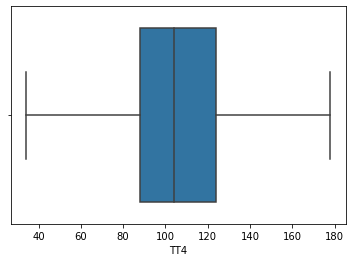

In [48]:
sns.boxplot(X_train_imp['TT4'])

<AxesSubplot:xlabel='TSH'>

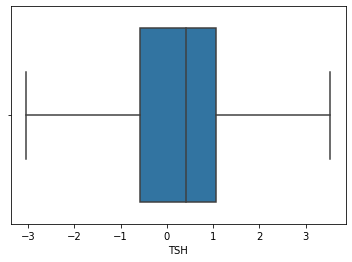

In [49]:
sns.boxplot(X_train_imp['TSH'])

In [50]:
X_train_ft_imp = X_train_imp[['TSH', 'FTI', 'TT4', 'T3', 'on thyroxine']]

In [51]:
X_test_imp['FTI'] = (X_test_imp['FTI'])**0.5
X_test_imp['T3'] = (X_test_imp['T3'])**0.5
X_test_imp['TSH'] = np.log((X_test_imp['TSH']))
X_test_imp['TT4'] = (X_test_imp['TT4'])**0.5

In [52]:
X_test_ft_imp = X_test_imp[['TSH', 'FTI', 'TT4', 'T3', 'on thyroxine']]

In [53]:
X_train_ft_imp.head()

,TSH,FTI,TT4,T3,on thyroxine
0,1.098612,10.148892,96.0,1.095445,0.0
1,0.875469,9.796342,125.0,1.449138,0.0
2,0.788457,9.219544,110.0,1.581139,0.0
3,2.389313,10.276186,116.8,1.489966,0.0
4,0.587787,9.848858,102.0,1.378405,0.0


In [54]:
X_test_ft_imp.head()

,TSH,FTI,TT4,T3,on thyroxine
0,-1.514128,11.832160,12.489996,1.612452,1.0
1,4.060443,4.472136,5.000000,1.549193,0.0
2,0.955511,9.486833,8.888194,1.449138,0.0
3,-2.525729,14.628739,16.031220,2.190890,0.0
4,-0.510826,12.083046,10.954451,1.224745,1.0


<AxesSubplot:xlabel='binaryClass', ylabel='count'>

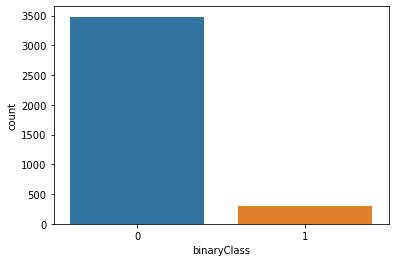

In [55]:
sns.countplot(df['binaryClass'])

In [56]:
df['binaryClass'].value_counts(normalize = True)

0    0.922853
1    0.077147
Name: binaryClass, dtype: float64

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X_train_ft_imp = sc.fit_transform(X_train_ft_imp)
scaled_X_test_ft_imp = sc.transform(X_test_ft_imp)

In [70]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [71]:
counter = Counter(y_train)
print('Before: ', counter)

smt = SMOTE()
scaled_X_train_ft_imp_smt,y_train_smt = smt.fit_resample(scaled_X_train_ft_imp, y_train)

counter_sm = Counter(y_train_smt)
print('After: ', counter_sm)

Before:  Counter({0: 2780, 1: 237})
After:  Counter({0: 2780, 1: 2780})


# MODEL FITTING

# Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(scaled_X_train_ft_imp_smt, y_train_smt)

LogisticRegression()

In [129]:
pred_train = log_reg.predict(scaled_X_train_ft_imp_smt)
pred_test = log_reg.predict(scaled_X_test_ft_imp)

In [130]:
print(accuracy_score(y_train_smt,pred_train))

0.9705035971223022


In [131]:
print(accuracy_score(y_test,pred_test))

0.9536423841059603


In [132]:
cmat_tree = pd.DataFrame(confusion_matrix(y_test,test_pred), index = ['Actual: No', 'Actual: Yes'], columns = ['Predicted: No', 'Predicted: Yes'])
cmat_tree

,Predicted: No,Predicted: Yes
Actual: No,685,16
Actual: Yes,0,54


# SVM

In [133]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
def classification(model,scaled_X_train_ft_imp_smt, y_train_smt, scaled_X_test_ft_imp, y_test):
    model.fit(scaled_X_train_ft_imp_smt, y_train_smt)
    train_pred = model.predict(scaled_X_train_ft_imp_smt)
    test_pred = model.predict(scaled_X_test_ft_imp)
    print(model)
    print('Accuracy on training set: ', accuracy_score(y_train_smt, train_pred))
    print('Accuracy on test set: ', accuracy_score(y_test, test_pred))

In [134]:
classification(SVC(kernel = 'rbf'),scaled_X_train_ft_imp_smt, y_train_smt, scaled_X_test_ft_imp, y_test)

SVC()
Accuracy on training set:  0.9751798561151079
Accuracy on test set:  0.9350993377483444


In [135]:
classification(SVC(kernel = 'linear'),scaled_X_train_ft_imp_smt, y_train_smt, scaled_X_test_ft_imp, y_test)

SVC(kernel='linear')
Accuracy on training set:  0.9685251798561151
Accuracy on test set:  0.9615894039735099


In [136]:
classification(SVC(kernel = 'poly', degree = 2),scaled_X_train_ft_imp_smt, y_train_smt, scaled_X_test_ft_imp, y_test)

SVC(degree=2, kernel='poly')
Accuracy on training set:  0.9118705035971223
Accuracy on test set:  0.9456953642384106


# DECISION TREE

In [137]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 5)
dtc.fit(scaled_X_train_ft_imp_smt, y_train_smt)

DecisionTreeClassifier(random_state=5)

In [138]:
pred_train = dtc.predict(scaled_X_train_ft_imp_smt)
pred_test = dtc.predict(scaled_X_test_ft_imp)

In [139]:
print(accuracy_score(y_train_smt,pred_train))

0.9992805755395684


In [140]:
print(accuracy_score(y_test,pred_test))

0.9536423841059603


### Our tree is overfitting, so we have to prune it

In [141]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[3,4,5],
         'min_samples_split':range(36,51),
         'min_samples_leaf':range(20,36),
         'max_features': range(3,5)}

model = DecisionTreeClassifier()
grid = GridSearchCV(model, param_grid = params, cv = 5, scoring = 'accuracy')
grid.fit(scaled_X_train_ft_imp_smt,y_train_smt)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5], 'max_features': range(3, 5),
                         'min_samples_leaf': range(20, 36),
                         'min_samples_split': range(36, 51)},
             scoring='accuracy')

In [142]:
grid.best_score_

0.981474820143885

In [143]:
grid.best_params_

{'max_depth': 5,
 'max_features': 4,
 'min_samples_leaf': 28,
 'min_samples_split': 48}

In [144]:
tree_best = grid.best_estimator_
tree_best.fit(scaled_X_train_ft_imp_smt,y_train_smt)

DecisionTreeClassifier(max_depth=5, max_features=4, min_samples_leaf=28,
                       min_samples_split=48)

In [145]:
train_pred = tree_best.predict(scaled_X_train_ft_imp_smt)
test_pred = tree_best.predict(scaled_X_test_ft_imp)

In [146]:
accuracy_score(y_train_smt,train_pred)

0.9811151079136691

In [147]:
accuracy_score(y_test,test_pred)

0.9788079470198675

In [148]:
cmat_tree = pd.DataFrame(confusion_matrix(y_test,test_pred), index = ['Actual: No', 'Actual: Yes'], columns = ['Predicted: No', 'Predicted: Yes'])
cmat_tree

,Predicted: No,Predicted: Yes
Actual: No,685,16
Actual: Yes,0,54


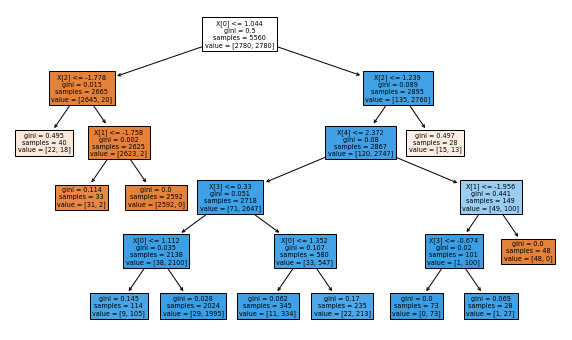

In [149]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn import tree
plt.figure(figsize = (10,6))
tree.plot_tree(tree_best, filled = True)
plt.show()